### 1.3
#### (1) 计算均值、方差、标准差、变异系数、偏度、峰度
均值 $ \overline{x}=\cfrac{1}{n} \displaystyle \sum_{i=1}^{n}x_i $

方差 $ S^2=\cfrac{1}{n-1}\displaystyle \sum_{i=1}^{n}(x_i-\overline{x})^2 $

标准差 $ S = \sqrt{S^2} $

变异系数 $ CV = \cfrac{S}{\overline{x}} \times 100\% $

$k$ 阶中心矩 $ \mu_k = \cfrac{1}{n}(x-\overline{x})^k $ 

偏度 $ G_3 = \cfrac{\mu_3}{\sigma^3} $

峰度 $ G_4 = \cfrac{\mu_4}{\sigma^4} $

In [62]:
import numpy as np
import pandas as pd 
import re
data = pd.DataFrame(np.array([[184, 207, 236, 262, 284, 311, 354, 437, 485, 550, 693, 762, 803, 896, 1070, 1331, 1746, 2336, 2641, 2834, 2972, 3180],
                     [138, 158, 178, 199, 221, 246, 283, 347, 376, 417, 508, 553, 571, 621, 718, 855, 1118, 1434, 1768, 1876, 1895, 1973],
                     [405, 434, 496, 562, 576, 603, 662, 802, 920, 1089, 1431, 1568, 1686, 1925, 2356, 3027, 3891, 4874, 5430, 5796, 6217, 6651]]).T, index=range(1978, 2000), columns=['全国居民', '农村居民', '城镇居民'])

x_mean = round(data.mean(), 2)
S_2 = round(np.var(data, ddof=1, axis=0), 2)
S = round(np.std(data, ddof=1, axis=0), 2)
CV = round(x_mean / S, 2)
G3 = round(data.skew(), 2)
G4 = round(data.kurt(), 2)
print('均值:', re.sub(r'\s+', ':', x_mean.to_string().replace('\n', ';')), '方差:', re.sub(r'\s+', ':', S_2.to_string().replace('\n', ';')),
      '标准差:', re.sub(r'\s+', ':', S.to_string().replace('\n', ';')), '变异系数:', re.sub(r'\s+', ':', CV.to_string().replace('\n', ';')),
      '偏度:', re.sub(r'\s+', ':', G3.to_string().replace('\n', ';')), '峰度:', re.sub(r'\s+', ':', G4.to_string().replace('\n', ';')), sep='\n')

均值:
全国居民:1117.00;农村居民:747.86;城镇居民:2336.41
方差:
全国居民:1031680.29;农村居民:399673.84;城镇居民:4536136.44
标准差:
全国居民:1015.72;农村居民:632.20;城镇居民:2129.82
变异系数:
全国居民:1.10;农村居民:1.18;城镇居民:1.10
偏度:
全国居民:1.02;农村居民:1.01;城镇居民:0.97
峰度:
全国居民:-0.46;农村居民:-0.45;城镇居民:-0.57


#### (2) 计算中位数、上下四分位数、四分位极差、三均值
中位数
$$
M=\begin{cases}
x_{(\frac{n+1}{2})} & n为奇数 \\
\frac{1}{2}(x_{(\frac{n}{2})}+x_{(\frac{n}{2}+1)}) & n为偶数
\end{cases}
$$

分位数
$$
M_p=
\begin{cases}
x_{([np]+1)} & np非整数 \\
\frac{1}{2}(x_{(np)}+x_{(np+1)}) & np为整数
\end{cases}
$$

四分位极差 $IQR=Q_3-Q_1$

三均值 $TM=\cfrac{1}{4}Q_1 + \cfrac{1}{2}M + \cfrac{1}{4}Q_3$

In [63]:
M = data.median()
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
TM = 1/4*Q1 + 1/2*M + 1/4*Q3
print('中位数:', re.sub(r'\s+', ':', M.to_string().replace('\n', ';')), '上四分位数:', re.sub(r'\s+', ':', Q1.to_string().replace('\n', ';')),
      '下四分位数:', re.sub(r'\s+', ':', Q3.to_string().replace('\n', ';')), '四分位极差:', re.sub(r'\s+', ':', IQR.to_string().replace('\n', ';')),
      '三均值:', re.sub(r'\s+', ':', TM.to_string().replace('\n', ';')), sep='\n')

中位数:
全国居民:727.5;农村居民:530.5;城镇居民:1499.5
上四分位数:
全国居民:321.75;农村居民:255.25;城镇居民:617.75
下四分位数:
全国居民:1642.25;农村居民:1052.25;城镇居民:3675.00
四分位极差:
全国居民:1320.50;农村居民:797.00;城镇居民:3057.25
三均值:
全国居民:854.7500;农村居民:592.1250;城镇居民:1822.9375


#### (3)直方图

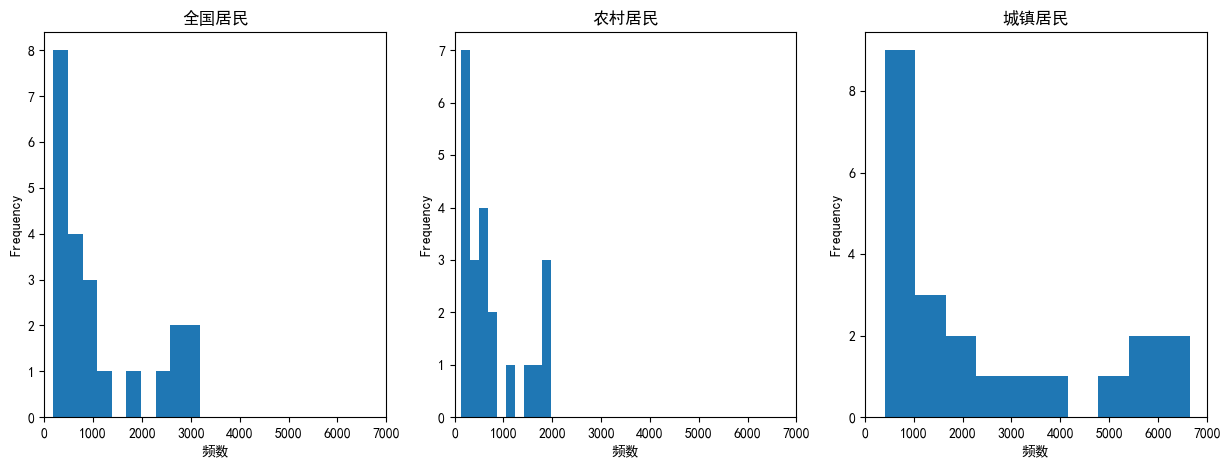

In [64]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 每一列分为10组，分别做直方图
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(data.columns):
    data[col].plot(kind='hist', bins=10, ax=axes[i], title=col)
    axes[i].set_xlabel('频数')
    axes[i].set_xlim(0, 7000)
plt.show()

#### (4)茎叶图
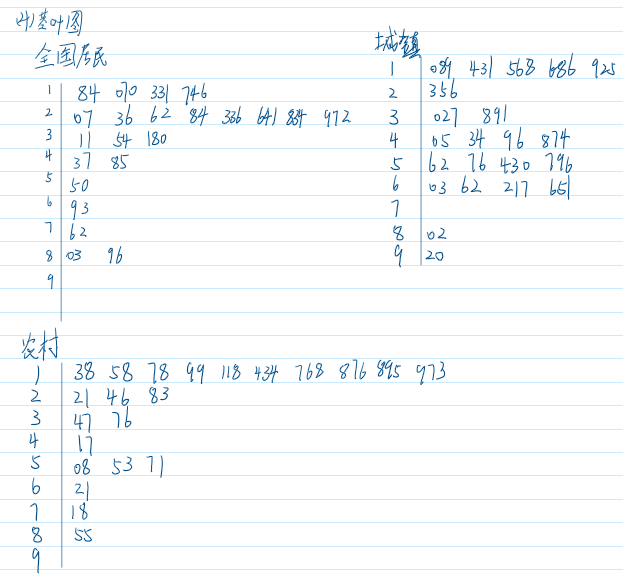

#### (5)找出异常值

$x_{error} \notin [Q_1-1.5IQR, Q_3+1.5IQR]$

In [65]:
for i in range(data.shape[1]):
    upper = Q1.iloc[i] - 1.5*IQR.iloc[i]
    lowwer = Q3.iloc[i] + 1.5*IQR.iloc[i]
    nation = data.iloc[:, i]
    print(data.columns[i])
    print(list(nation[(nation < upper) | (nation > lowwer)]))

全国居民
[]
农村居民
[]
城镇居民
[]


### 1.4
#### (1) 计算均值、方差、标准差、变异系数、偏度、峰度

In [66]:
data1 = pd.DataFrame([[35.22, 499.80], [10.41, 161.37], [17.22, 273.29], [10.70, 134.79],
                      [10.29, 90.92], [18.66, 348.99], [4.41, 106.89], [6.24, 196.44],
                      [49.72, 656.95], [47.70, 580.70], [36.55, 518.10], [14.85, 179.41],
                      [19.46, 250.16], [10.93, 122.06], [40.26, 552.74], [19.82, 268.20],
                      [19.49, 221.43], [16.01, 197.68], [99.32, 1080.26],[14.77, 160.60],
                      [3.96, 39.51], [10.49, 111.76], [21.71, 250.09], [13.06, 95.87],
                      [20.34, 183.62], [0.77, 6.08], [11.38, 133.50], [3.66, 64.86],
                      [1.21, 18.30],[2.31, 23.81], [3.24, 103.81]], columns=['11月', '1~11月'], index=range(1, 32))
x1_mean = round(data1.mean(), 2)
S1_2 = round(np.var(data1, ddof=1, axis=0), 2)
S1 = round(np.std(data1, ddof=1, axis=0), 2)
CV1 = round(x1_mean / S1, 2)
G31 = round(data1.skew(), 2)
G41 = round(data1.kurt(), 2)
print('均值:', re.sub(r'\s+', ':', x1_mean.to_string().replace('\n', ';')), '方差:', re.sub(r'\s+', ':', S1_2.to_string().replace('\n', ';')),
      '标准差:', re.sub(r'\s+', ':', S1.to_string().replace('\n', ';')), '变异系数:', re.sub(r'\s+', ':', CV1.to_string().replace('\n', ';')),
      '偏度:', re.sub(r'\s+', ':', G31.to_string().replace('\n', ';')), '峰度:', re.sub(r'\s+', ':', G41.to_string().replace('\n', ';')), sep='\n')


均值:
11月:19.17;1~11月:246.19
方差:
11月:392.03;1~11月:54276.00
标准差:
11月:19.80;1~11月:232.97
变异系数:
11月:0.97;1~11月:1.06
偏度:
11月:2.52;1~11月:1.92
峰度:
11月:8.27;1~11月:4.39


#### (2) 计算中位数、上下四分位数、四分位极差、三均值

In [67]:
M1 = data1.median()
Q11 = data1.quantile(0.25)
Q31 = data1.quantile(0.75)
IQR1 = Q31 - Q11
TM1 = 1/4*Q11 + 1/2*M1 + 1/4*Q31
print('中位数:', re.sub(r'\s+', ':', M1.to_string().replace('\n', ';')), '上四分位数:', re.sub(r'\s+', ':', Q11.to_string().replace('\n', ';')),
      '下四分位数:', re.sub(r'\s+', ':', Q31.to_string().replace('\n', ';')), '四分位极差:', re.sub(r'\s+', ':', IQR1.to_string().replace('\n', ';')),
      '三均值:', re.sub(r'\s+', ':', TM1.to_string().replace('\n', ';')), sep='\n')

中位数:
11月:14.77;1~11月:179.41
上四分位数:
11月:8.265;1~11月:105.350
下四分位数:
11月:20.080;1~11月:270.745
四分位极差:
11月:11.815;1~11月:165.395
三均值:
11月:14.47125;1~11月:183.72875


#### (3)作出直方图

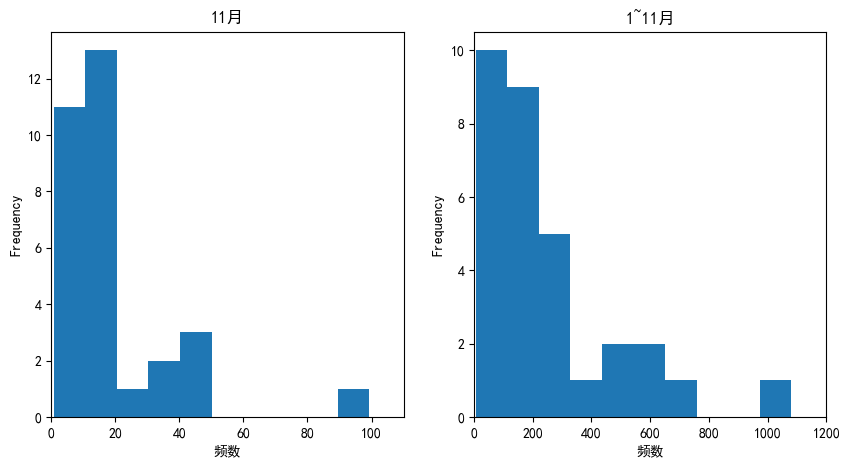

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
lim = [110, 1200]
for i, col in enumerate(data1.columns):
    data1[col].plot(kind='hist', bins=10, ax=axes[i], title=col)
    axes[i].set_xlabel('频数')
    axes[i].set_xlim(0, lim[i])
plt.show()

#### (4)经验分布函数图

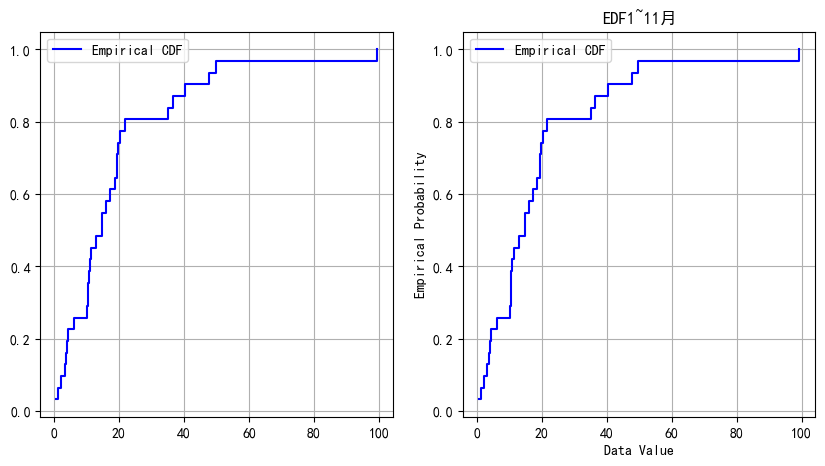

In [69]:
def empirical_distribution_function(data):
    n = len(data)
    sorted_data = np.sort(data)
    
    # 计算经验分布函数
    ecdf = np.arange(1, n + 1) / n
    return sorted_data, ecdf
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    # 获取排序的数据和对应的经验分布函数值
    sorted_data, ecdf = empirical_distribution_function(data1.iloc[:, 0])
    # 绘制经验分布函数曲线
    axes[i].step(sorted_data, ecdf, where='post', label='Empirical CDF', color='blue')
    axes[i].grid()
    axes[i].legend()
plt.title('EDF'+data1.columns[i])
plt.xlabel('Data Value')
plt.ylabel('Empirical Probability')
plt.show()

#### (5)相关系数矩阵

皮尔逊
 $\rho\left(X,Y\right)=\frac{n\sum_{1}^{n}XY-\sum_{1}^{n}X\sum_{1}^{n}Y}{\sqrt{\left(n\sum_{1}^{n}X^2-\left(\sum_{1}^{n}X\right)^2\right)\left(n\sum_{1}^{n}Y^2-\left(\sum_{1}^{n}Y\right)^2\right)}}$

斯皮尔曼
 $\rho \; = \;\frac{{\sum\limits_{i = 1}^n ( R({x_i}) - \overline {R(x)} ){\mkern 1mu} (R({y_i}) - \overline {R(y)} )}}{{\sqrt {\sum\limits_{i = 1}^n ( R({x_i}) - \overline {R(x)} {)^2}} \;\sqrt {\sum\limits_{i = 1}^n ( R({y_i}) - \overline {R(y)} {)^2}} }}$

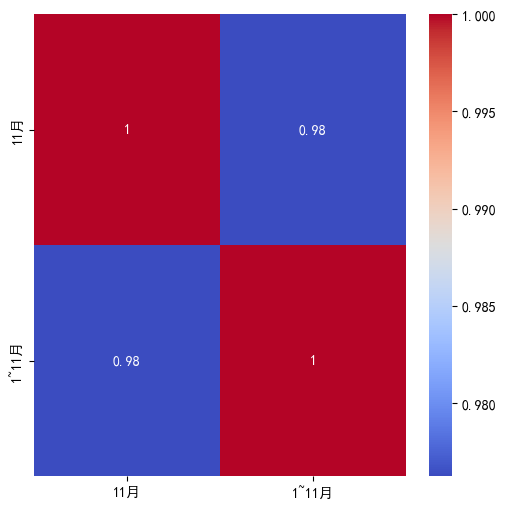

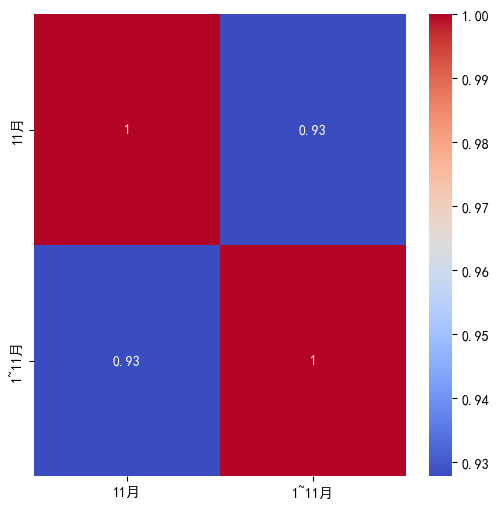

In [70]:
import seaborn as sns
plt.figure(figsize=(6, 6))
# 皮尔逊
sns.heatmap(data1.corr(method='pearson'),  
            annot=True,  
            cmap='coolwarm')
plt.show()

plt.figure(figsize=(6, 6))
# 斯皮尔曼
sns.heatmap(data1.corr(method='spearman'),  
            annot=True,  
            cmap='coolwarm')
plt.show()